<a href="https://colab.research.google.com/github/DFwJZ/Real-time_Bot_Detection/blob/main/Numerical_data_only_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
!pip install tqdm

In [ ]:
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import nltk
import re
import string
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_path = "/content/drive/My Drive/Colab Notebooks/Summer_Camp/Bot_detection"

Mounted at /content/drive


In [ ]:
data = pd.read_csv(f'{root_path}/final_dataset_updated.csv')

In [ ]:
data_df = pd.DataFrame(data)

In [ ]:
data_df.shape

(24638, 14)

In [ ]:
data_df.head()

,Unnamed: 0,created_at,id,name,screen_name,description,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,profile_image_url,bots
0,0,Mon Jan 21 19:37:21 +0000 2019,613512037,Baseball Quotes,BaseballQuotes1,Quoting America's Pastime in 280 characters or...,121500,346,532,35894,0.0,21246,http://pbs.twimg.com/profile_images/5591554026...,0
1,1,Mon Jan 21 20:42:18 +0000 2019,19263978,Cleveland Cavaliers,cavs,Official Twitter of the 2016 NBA Champion Clev...,3227215,1946,9039,16134,1.0,45791,http://pbs.twimg.com/profile_images/1079823292...,0
2,2,Mon Jan 21 19:18:27 +0000 2019,1624329463,‏المهاجر 1M,muohajer_12,NaN,864968,767106,1371,23,0.0,875763,http://pbs.twimg.com/profile_images/6431284531...,1
3,3,Mon Jan 21 14:45:13 +0000 2019,550610050,BC.20,Bc20_,R.I.P JRL21//R.I.P Monica💙 IG//b.20c #GLOHIOBOYS,951,275,9,22147,0.0,88862,http://pbs.twimg.com/profile_images/1080054944...,0
4,4,Mon Jan 21 20:28:43 +0000 2019,149714640,mia 🧜🏾‍♀️🖤💋,_Blkahontas,to die for 🔮🤞🏾👸🏾,1412,623,12,5582,0.0,142073,http://pbs.twimg.com/profile_images/1080969379...,0


In [ ]:
data_labels = data_df['bots']
data_labels

0        0
1        0
2        1
3        0
4        0
        ..
24633    0
24634    0
24635    0
24636    0
24637    0
Name: bots, Length: 24638, dtype: int64

In [ ]:
# Define the function for text preprocessing
def preprocess_text(text):
    # Lowercase the letters
    text = str(text)
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Remove punctuations
    text = "".join([char for char in text if char not in string.punctuation])

    # Remove stopwords
    stopword = stopwords.words('english')
    text = " ".join([word for word in re.split('\W+', text) if word not in stopword])

    # Lemmatization
    wn = WordNetLemmatizer()
    text = " ".join([wn.lemmatize(word, 'v') for word in re.split('\W+', text)])

    return text


In [ ]:
tqdm.tqdm.pandas()

In [ ]:
# Apply the function to the 'text' column of the genuine DataFrame
data_df['preprocessed_text'] = data_df['description'].progress_apply(preprocess_text)

data_df.head()

100%|██████████| 24638/24638 [00:05<00:00, 4275.90it/s]


,Unnamed: 0,created_at,id,name,screen_name,description,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,profile_image_url,bots,preprocessed_text
0,0,Mon Jan 21 19:37:21 +0000 2019,613512037,Baseball Quotes,BaseballQuotes1,Quoting America's Pastime in 280 characters or...,121500,346,532,35894,0.0,21246,http://pbs.twimg.com/profile_images/5591554026...,0,quote americas pastime 280 character less
1,1,Mon Jan 21 20:42:18 +0000 2019,19263978,Cleveland Cavaliers,cavs,Official Twitter of the 2016 NBA Champion Clev...,3227215,1946,9039,16134,1.0,45791,http://pbs.twimg.com/profile_images/1079823292...,0,official twitter 2016 nba champion cleveland c...
2,2,Mon Jan 21 19:18:27 +0000 2019,1624329463,‏المهاجر 1M,muohajer_12,NaN,864968,767106,1371,23,0.0,875763,http://pbs.twimg.com/profile_images/6431284531...,1,nan
3,3,Mon Jan 21 14:45:13 +0000 2019,550610050,BC.20,Bc20_,R.I.P JRL21//R.I.P Monica💙 IG//b.20c #GLOHIOBOYS,951,275,9,22147,0.0,88862,http://pbs.twimg.com/profile_images/1080054944...,0,rip jrl21rip monica igb20c glohioboys
4,4,Mon Jan 21 20:28:43 +0000 2019,149714640,mia 🧜🏾‍♀️🖤💋,_Blkahontas,to die for 🔮🤞🏾👸🏾,1412,623,12,5582,0.0,142073,http://pbs.twimg.com/profile_images/1080969379...,0,die


In [ ]:
# Define a function to calculate the number of unique words in a text
def count_unique_words(text):
    words = text.split()
    return len(set(words))


# Create a feature for the length of each tweet
data_df['tweet_length'] = data_df['preprocessed_text'].progress_apply(len)

# Create a feature for the number of unique words in each tweet
data_df['num_unique_words'] = data_df['preprocessed_text'].progress_apply(count_unique_words)

data_df.head()

100%|██████████| 24638/24638 [00:00<00:00, 365872.63it/s]


,Unnamed: 0,created_at,id,name,screen_name,description,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,profile_image_url,bots,preprocessed_text,tweet_length,num_unique_words
0,0,Mon Jan 21 19:37:21 +0000 2019,613512037,Baseball Quotes,BaseballQuotes1,Quoting America's Pastime in 280 characters or...,121500,346,532,35894,0.0,21246,http://pbs.twimg.com/profile_images/5591554026...,0,quote americas pastime 280 character less,41,6
1,1,Mon Jan 21 20:42:18 +0000 2019,19263978,Cleveland Cavaliers,cavs,Official Twitter of the 2016 NBA Champion Clev...,3227215,1946,9039,16134,1.0,45791,http://pbs.twimg.com/profile_images/1079823292...,0,official twitter 2016 nba champion cleveland c...,75,9
2,2,Mon Jan 21 19:18:27 +0000 2019,1624329463,‏المهاجر 1M,muohajer_12,NaN,864968,767106,1371,23,0.0,875763,http://pbs.twimg.com/profile_images/6431284531...,1,nan,3,1
3,3,Mon Jan 21 14:45:13 +0000 2019,550610050,BC.20,Bc20_,R.I.P JRL21//R.I.P Monica💙 IG//b.20c #GLOHIOBOYS,951,275,9,22147,0.0,88862,http://pbs.twimg.com/profile_images/1080054944...,0,rip jrl21rip monica igb20c glohioboys,37,5
4,4,Mon Jan 21 20:28:43 +0000 2019,149714640,mia 🧜🏾‍♀️🖤💋,_Blkahontas,to die for 🔮🤞🏾👸🏾,1412,623,12,5582,0.0,142073,http://pbs.twimg.com/profile_images/1080969379...,0,die,4,1


In [ ]:
print(len(data_df['created_at'].unique()))

21122


In [ ]:
print(data_df['created_at'].unique()[:20])

['Mon Jan 21 19:37:21 +0000 2019' 'Mon Jan 21 20:42:18 +0000 2019'
 'Mon Jan 21 19:18:27 +0000 2019' 'Mon Jan 21 14:45:13 +0000 2019'
 'Mon Jan 21 20:28:43 +0000 2019' 'Mon Jan 21 19:52:24 +0000 2019'
 'Sun Jul 23 06:29:23 +0000 2017' 'Mon Jan 21 14:04:42 +0000 2019'
 'Mon Jan 21 06:48:13 +0000 2019' 'Wed Jan 09 09:44:07 +0000 2019'
 'Sat Jan 19 07:15:52 +0000 2019' 'Mon Jan 21 20:23:41 +0000 2019'
 'Mon Jan 21 17:44:16 +0000 2019' 'Mon Jan 21 21:18:47 +0000 2019'
 'Mon Jan 21 19:32:07 +0000 2019' 'Mon Jan 21 13:38:39 +0000 2019'
 'Mon Jan 21 21:14:13 +0000 2019' 'Mon Jan 21 15:38:45 +0000 2019'
 'Mon Jan 21 21:02:57 +0000 2019' 'Sun Jan 20 19:41:58 +0000 2019']


In [ ]:
# Convert the timestamp to seconds by dividing by 1000
timestamp = '1262785184000L'

timestamp = timestamp.replace("L", "")

timestamp = int(timestamp) / 1000

# Convert the timestamp to a datetime object
dt = datetime.fromtimestamp(timestamp)

# Extract the hour of the day, day of the week, and month
hour_of_day = dt.hour
day_of_week = dt.weekday()  # Note: Monday is 0, Sunday is 6
month = dt.month

print(hour_of_day, day_of_week, month)


13 2 1


In [ ]:
def convert_timestamp(timestamp):
    try:
        if timestamp[-1] == 'L' and timestamp[:-1].isdigit():
            timestamp = timestamp[:-1]  # Remove the 'L' suffix
            timestamp = int(timestamp) / 1000
            return pd.to_datetime(timestamp, unit='s')
        else:
            return pd.to_datetime(timestamp, format="%a %b %d %H:%M:%S %z %Y")
    except ValueError:
        print(f"ValueError for timestamp: {timestamp}")
        return None


# Apply the conversion function to each timestamp
data_df['created_at'] = data_df['created_at'].apply(convert_timestamp)

# Create the 'hour_of_day', 'day_of_week' and 'month' columns
data_df['hour_of_day'] = data_df['created_at'].dt.hour
data_df['day_of_week'] = data_df['created_at'].dt.dayofweek  # Note: Monday is 0, Sunday is 6
data_df['month'] = data_df['created_at'].dt.month

In [ ]:
data_df.shape

(24638, 22)

In [ ]:
nan_indices = data_df.index[data_df.isna().any(axis=1)]
nan_rows = data_df[data_df.isna().any(axis=1)]
print(nan_rows)


       Unnamed: 0                created_at                  id  \
2               2 2019-01-21 19:18:27+00:00          1624329463   
6               6 2017-07-23 06:29:23+00:00  728040086848319489   
35             35 2019-01-20 20:27:44+00:00           113125130   
45             45 2018-05-19 20:26:36+00:00          4080133834   
50             50 2019-01-21 20:47:56+00:00  872978711116746752   
...           ...                       ...                 ...   
24590         469 2017-08-18 17:03:18+00:00           433335138   
24607         486 2018-04-18 14:33:18+00:00           353990109   
24610         489 2017-07-05 12:35:38+00:00            17168396   
24616         495 2017-06-12 00:15:06+00:00  854280715520933888   
24631         510 2017-12-07 05:56:46+00:00          4669895593   

                 name      screen_name description  followers_count  \
2         ‏المهاجر 1M      muohajer_12         NaN           864968   
6                   .            997JK         NaN   

In [ ]:
data_df_nona = data_df.dropna()

data_df_nona.shape

(17200, 22)

In [ ]:
# Select the numerical columns
weight_factor = 2  # Adjust this factor as per your preference

# Multiply the follower-related values by the weight factor
data_df['followers_count_weighted'] = data_df['followers_count'] * weight_factor
data_df['friends_count_weighted'] = data_df['friends_count'] * weight_factor

# Add the weighted features to your numerical_cols list
numerical_cols = ['followers_count_weighted', 'friends_count_weighted', 'listed_count', 'favourites_count', 'verified', 'statuses_count', 'hour_of_day', 'day_of_week', 'month', 'tweet_length', 'num_unique_words']

df_numerical = data_df[numerical_cols]

In [ ]:
df_numerical.head(20)

,followers_count_weighted,friends_count_weighted,listed_count,favourites_count,verified,statuses_count,hour_of_day,day_of_week,month,tweet_length,num_unique_words
0,121500,346,532,35894,0.0,21246,19.0,0.0,1.0,41,6
1,3227215,1946,9039,16134,1.0,45791,20.0,0.0,1.0,75,9
2,864968,767106,1371,23,0.0,875763,19.0,0.0,1.0,3,1
3,951,275,9,22147,0.0,88862,14.0,0.0,1.0,37,5
4,1412,623,12,5582,0.0,142073,20.0,0.0,1.0,4,1
5,1615,182,27,34629,0.0,85419,19.0,0.0,1.0,12,3
6,155,0,2,57,0.0,4098,6.0,6.0,7.0,3,1
7,1231,1089,68,2017,0.0,22256,14.0,0.0,1.0,75,12
8,378218,347,646,120,0.0,110251,6.0,0.0,1.0,82,13
9,820881,5,8578,924,0.0,13559,9.0,2.0,1.0,90,16


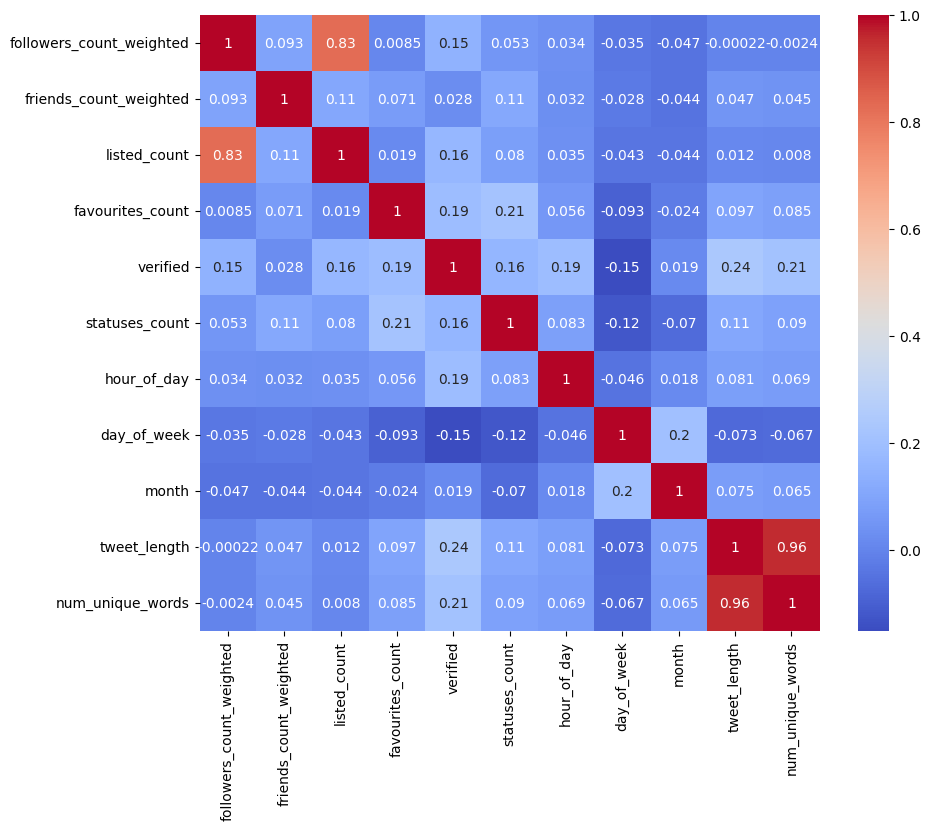

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_numerical.shape

(24638, 11)

### K-Means Model Apply

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')  # Use median if the data is not normally distributed
df_imputed = imputer.fit_transform(df_numerical)

df_scaled = scaler.fit_transform(df_imputed)

NameError: ignored

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [ ]:
df_numerical['cluster'] = kmeans.labels_

<ipython-input-224-3f2256bd8d70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['cluster'] = kmeans.labels_


In [ ]:
df_numerical.head(20)

,followers_count_weighted,friends_count_weighted,listed_count,favourites_count,verified,statuses_count,hour_of_day,day_of_week,month,tweet_length,num_unique_words
0,243000,692,532,35894,0.0,21246,19.0,0.0,1.0,41,6
1,6454430,3892,9039,16134,1.0,45791,20.0,0.0,1.0,75,9
2,1729936,1534212,1371,23,0.0,875763,19.0,0.0,1.0,3,1
3,1902,550,9,22147,0.0,88862,14.0,0.0,1.0,37,5
4,2824,1246,12,5582,0.0,142073,20.0,0.0,1.0,4,1
5,3230,364,27,34629,0.0,85419,19.0,0.0,1.0,12,3
6,310,0,2,57,0.0,4098,6.0,6.0,7.0,3,1
7,2462,2178,68,2017,0.0,22256,14.0,0.0,1.0,75,12
8,756436,694,646,120,0.0,110251,6.0,0.0,1.0,82,13
9,1641762,10,8578,924,0.0,13559,9.0,2.0,1.0,90,16


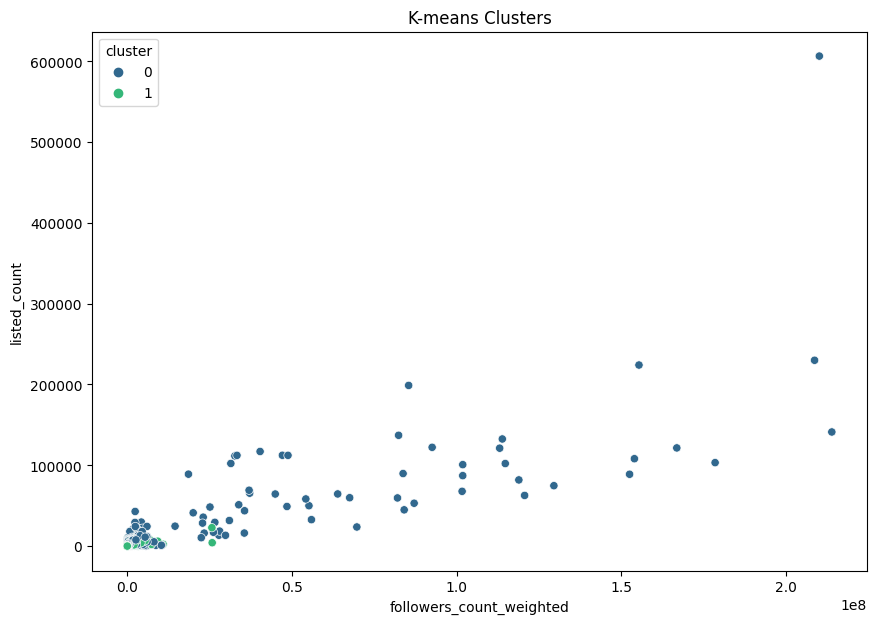

In [ ]:
# Let's use the first two features to visualize for simplicity.
# bot: 1, human: 0
plt.figure(figsize=(10, 7))

sns.scatterplot(data=df_numerical, x="followers_count_weighted", y="listed_count", hue="cluster", palette="viridis")

plt.title('K-means Clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score = silhouette_score(df_scaled, kmeans.labels_)
print('Silhouette Score: %.3f' % score)

In [ ]:
df_numerical['predicted_clusters'] =  1 - df_numerical['cluster']

<ipython-input-227-2d200adc7855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['predicted_clusters'] =  1 - df_numerical['cluster']


In [ ]:
accuracy = accuracy_score(data_labels, df_numerical['cluster'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.6239548664664339


In [ ]:
df_numerical.to_csv(f'{root_path}/paser_output.csv', index=False)


In [ ]:
df_data_ = pd.read_csv(f'{root_path}/paser_output.csv')

df_data_.head

<bound method NDFrame.head of        followers_count_weighted  friends_count_weighted  listed_count  \
0                        243000                     692           532   
1                       6454430                    3892          9039   
2                       1729936                 1534212          1371   
3                          1902                     550             9   
4                          2824                    1246            12   
...                         ...                     ...           ...   
24633                      2302                    1250            41   
24634                      4344                    3098           292   
24635                       336                     146             9   
24636                       386                     132             0   
24637                       520                     914             9   

       favourites_count  verified  statuses_count  hour_of_day  day_of_week  \
0             

In [ ]:
df_data_['bots'] = data_labels

NameError: ignored

In [ ]:
df_data_.head()

,followers_count_weighted,friends_count_weighted,listed_count,favourites_count,verified,statuses_count,hour_of_day,day_of_week,month,tweet_length,num_unique_words,cluster,predicted_clusters,bots
0,243000,692,532,35894,0.0,21246,19.0,0.0,1.0,41,6,1,0,0
1,6454430,3892,9039,16134,1.0,45791,20.0,0.0,1.0,75,9,0,1,0
2,1729936,1534212,1371,23,0.0,875763,19.0,0.0,1.0,3,1,0,1,1
3,1902,550,9,22147,0.0,88862,14.0,0.0,1.0,37,5,1,0,0
4,2824,1246,12,5582,0.0,142073,20.0,0.0,1.0,4,1,1,0,0


In [ ]:
df_data_.to_csv(f'{root_path}/parser_output_with_labels.csv', index=False)


In [ ]:
df_data_2 = pd.read_csv(f'{root_path}/parser_output_with_labels.csv')

In [ ]:
df_data_2

,followers_count_weighted,friends_count_weighted,listed_count,favourites_count,verified,statuses_count,hour_of_day,day_of_week,month,tweet_length,num_unique_words,cluster,predicted_clusters,bots
0,243000,692,532,35894,0.0,21246,19.0,0.0,1.0,41,6,1,0,0
1,6454430,3892,9039,16134,1.0,45791,20.0,0.0,1.0,75,9,0,1,0
2,1729936,1534212,1371,23,0.0,875763,19.0,0.0,1.0,3,1,0,1,1
3,1902,550,9,22147,0.0,88862,14.0,0.0,1.0,37,5,1,0,0
4,2824,1246,12,5582,0.0,142073,20.0,0.0,1.0,4,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24633,2302,1250,41,1785,0.0,1814,12.0,2.0,4.0,40,6,1,0,0
24634,4344,3098,292,67335,0.0,64696,14.0,2.0,4.0,93,11,0,1,0
24635,336,146,9,30,0.0,5549,13.0,2.0,4.0,107,14,0,1,0
24636,386,132,0,2962,0.0,1648,10.0,5.0,3.0,31,6,1,0,0


In [ ]:
counts_labeled = df_data_2['bots'].value_counts()

counts_labeled

1    15454
0     9184
Name: bots, dtype: int64

In [ ]:
counts_clustered = df_data_2['predicted_clusters'].value_counts()

# counts_clustered = counts_clustered.reindex(counts_labeled.index)
counts_clustered

0    14253
1    10385
Name: predicted_clusters, dtype: int64

In [ ]:
total_counts_labeled = counts_labeled[1] + counts_labeled[0]

bot_counts = counts_labeled[0] / total_counts_labeled

human_counts = counts_labeled[1] / total_counts_labeled

print(f'human percentage: {round(human_counts * 100, 2)}%, bots percentage: {round(bot_counts * 100, 2)}%')

human percentage: 62.72%, bots percentage: 37.28%


In [ ]:
total_counts_clustered = counts_clustered.iloc[1]  + counts_clustered.iloc[0]

bot_counts_clustered = counts_clustered.iloc[0]  / total_counts_clustered

human_counts_clustered = counts_clustered.iloc[1] / total_counts_clustered

print(f'human percentage: {round(human_counts_clustered * 100, 2)}%, bots percentage: {round(bot_counts_clustered * 100, 2)}%')

human percentage: 57.85%, bots percentage: 42.15%


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score


y_true = df_data_2['bots'].values # Bots: 1
y_pred = df_data_2['predicted_clusters'].values # Human: 0

# Confusion matrix
# TP FP
# FN TN
cm = confusion_matrix(y_true, y_pred)

print(f"Confusion Matrix:\n {cm}\n")

# Precision: TP/ (TP + FP), number of true bots prediciton
# Recall: TP/(TP + FN),

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'Precision: {round(precision, 4)}\nRecall: {round(recall, 4)}\n')

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}\n")



Confusion Matrix:
 [[ 4032  5152]
 [10221  5233]]

Precision: 0.5039
Recall: 0.3386

F1 Score: 0.40504663493169235



In [ ]:
# TODO:
# Manually investigate the clustered human and bots twitter account are actually correct.